# Problem Statement

**Context:**  
Jamboree Education has a rich history of helping students achieve high scores and gain admission to top universities globally, including the Ivy League. Recently, Jamboree launched a new feature that allows prospective students to estimate their likelihood of admission based on their academic and profile characteristics. This analysis aims to understand the key factors influencing graduate admissions and build a predictive model to estimate the probability of acceptance.

**Objective:**  
1. Identify and analyze the factors that significantly impact the probability of graduate admission for students.
2. Develop a linear regression model to predict a student's chance of admission given various profile factors.
3. Provide insights and recommendations based on the analysis to support Jamboree's new feature and enhance its predictive capabilities.


# Dataset Description

The dataset contains information about various factors influencing graduate admissions. Below is a list of columns and their descriptions:

- **Serial No.**: Unique row identifier (to be dropped for analysis purposes).
- **GRE Scores**: Graduate Record Examination scores, out of 340.
- **TOEFL Scores**: Test of English as a Foreign Language scores, out of 120.
- **University Rating**: Rating of the university (out of 5).
- **SOP**: Strength of Statement of Purpose and Letter of Recommendation (out of 5).
- **Undergraduate GPA**: Grade Point Average during undergraduate studies (out of 10).
- **Research**: Research experience (1 if the applicant has research experience; 0 if not).
- **Chance of Admit**: The probability of admission, ranging from 0 to 1.

### Concepts Used
The following concepts will guide the analysis:
- **Exploratory Data Analysis (EDA)**: To understand the structure and relationships within the data.
- **Linear Regression**: To model and predict the probability of admission based on various features.


# Exploratory Data Analysis (EDA)

The objective of this step is to explore the dataset to understand its structure, identify any data quality issues, and uncover patterns or relationships between variables. This will guide the subsequent modeling stages.

### Steps to Perform in EDA

1. **Data Importation and Initial Inspection**
   - Check the shape and structure of the data.
   - Inspect data types and check for any necessary conversions.
   - Identify missing values and handle them if necessary.
   - Generate a statistical summary of numerical attributes.

2. **Drop the Unique Row Identifier**
   - Drop the `Serial No.` column to prevent it from influencing the model.

3. **Univariate Analysis**
   - Explore the distributions of continuous variables.
   - Plot count distributions for categorical variables.

4. **Bivariate Analysis**
   - Analyze relationships between key variables.
   - Plot correlation matrix to visualize relationships between numerical variables.

5. **Outlier Detection and Handling**
   - Identify and address any outliers that might affect analysis.

### Expected Outputs
- Summary statistics and correlation matrix.
- Visualizations of variable distributions and relationships.
- Observations on data structure, distribution, and relationships.


### Data Importation and Initial Inspection

In this step, we will import the dataset, check its shape, inspect data types, look for missing values, and generate a statistical summary. This helps us understand the basic structure and characteristics of the dataset.


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('Jamboree_Admission.csv')  # Make sure the dataset is uploaded to Colab

# Display the first few rows of the dataset
data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# Checking the shape and structure of the dataset
print("Dataset shape:", data.shape)
print("\nDataset info:")
data.info()



Dataset shape: (500, 9)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:

# Checking for missing values
print("\nMissing values per column:")
print(data.isnull().sum())



Missing values per column:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [5]:

# Displaying basic statistics of the dataset
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
# Dropping 'Serial No.' column if it exists
if 'Serial No.' in data.columns:
    data.drop(columns=['Serial No.'], inplace=True)
    print("\nDropped 'Serial No.' column.")



Dropped 'Serial No.' column.


### Univariate Analysis

In this step, we will explore the distribution of individual variables to understand their characteristics. Continuous variables will be visualized with histograms and density plots, while categorical variables will be analyzed with count plots.


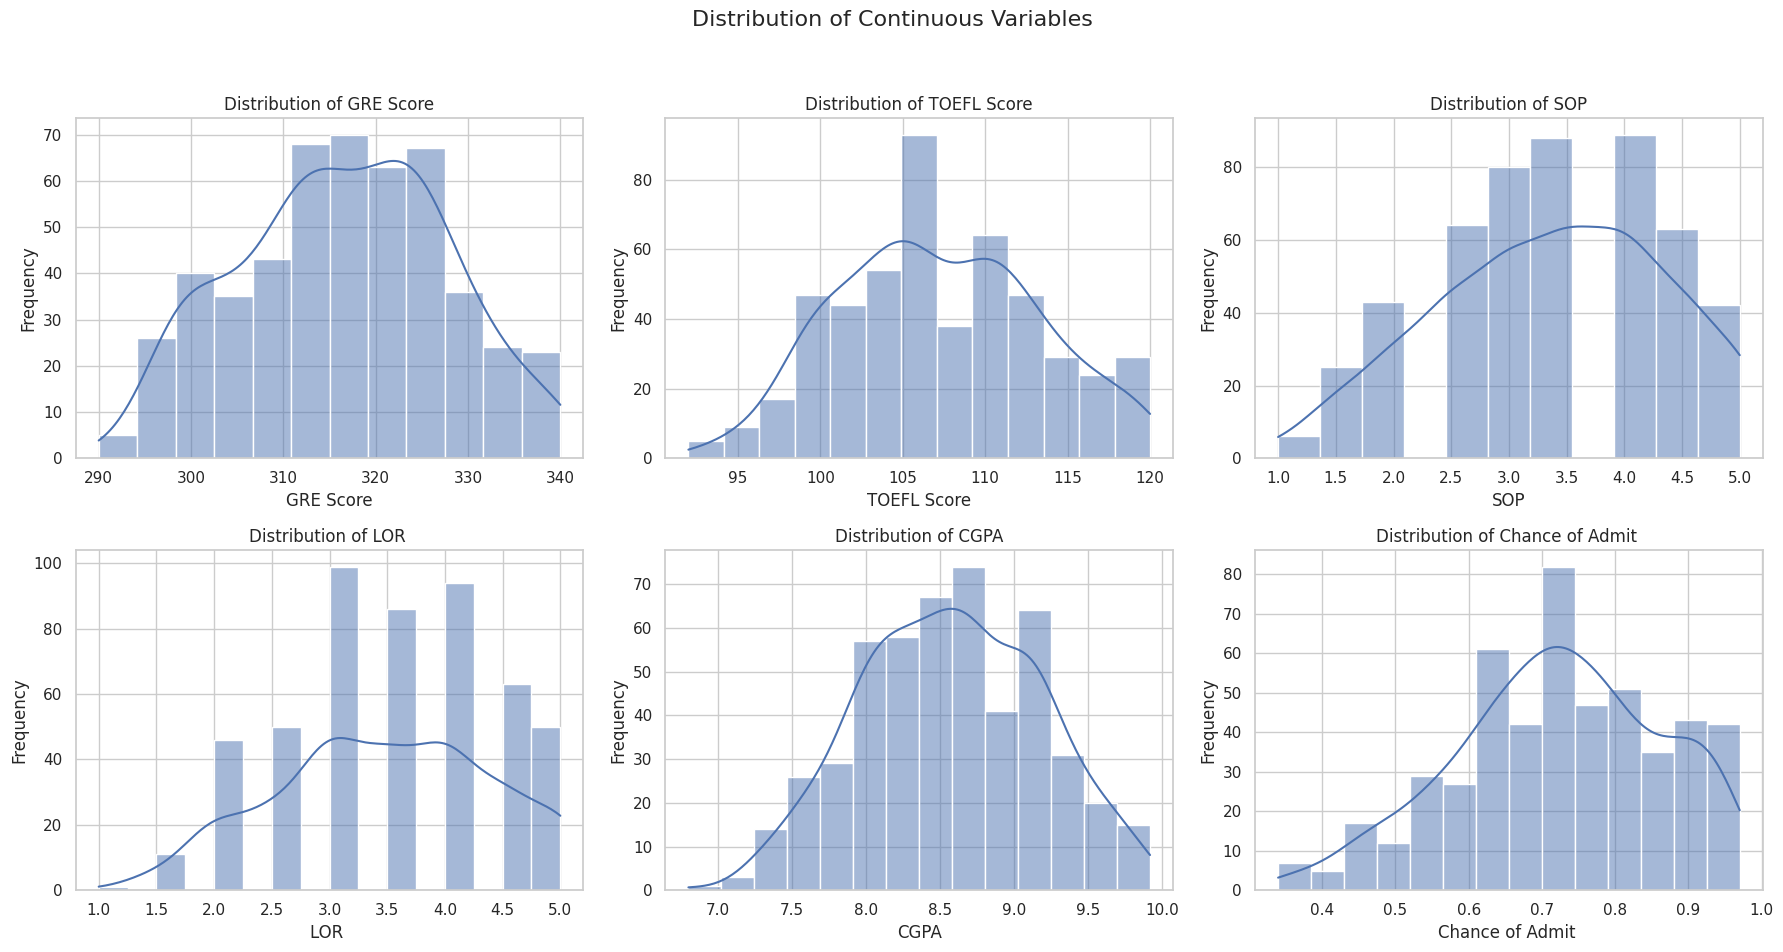

In [19]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the visual style
sns.set(style="whitegrid")

# Continuous variables to plot (adjusting for exact column names)
continuous_vars = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit ']

# Create a 2x3 grid for histograms
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Distribution of Continuous Variables", fontsize=16)

# Plot each histogram in its respective subplot
for i, var in enumerate(continuous_vars):
    row, col = divmod(i, 3)
    sns.histplot(data[var], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the title
plt.show()


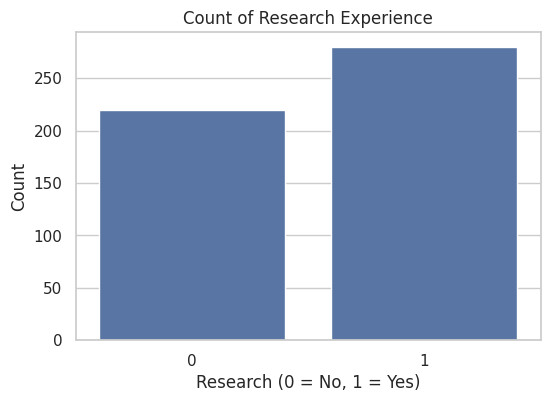

In [8]:
# Count plot for the Research variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Research', data=data)
plt.title('Count of Research Experience')
plt.xlabel('Research (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


### Univariate Analysis Insights

1. **GRE Score**: The GRE scores are generally concentrated around 310-320, with a slight tail on both ends. This indicates that most applicants have similar academic performance in standardized tests, with fewer applicants scoring at the lower and higher extremes.

2. **TOEFL Score**: TOEFL scores are primarily clustered around 105-110. This suggests that applicants have similar English proficiency levels, with only a few outliers at the lower and higher ends.

3. **SOP (Statement of Purpose)**: The SOP scores are approximately normally distributed, with most applicants having average to above-average SOP ratings (3.0 to 4.0). This distribution may indicate that the majority of applicants put in a moderate level of effort into their SOP.

4. **LOR (Letter of Recommendation)**: The LOR ratings follow a similar pattern as SOP, with most ratings between 3.0 and 4.5. This suggests that applicants generally receive positive recommendations, with only a few weaker scores.

5. **CGPA**: The CGPA distribution is slightly right-skewed, indicating that most students have GPAs between 8.0 and 9.0, with fewer students at the lower and upper ends of the scale. This reflects a generally high academic performance among applicants.

6. **Chance of Admit**: The "Chance of Admit" is also slightly right-skewed, with most applicants having a moderate-to-high probability of admission (0.6 to 0.8). This distribution implies that applicants tend to have a reasonably strong chance of admission based on the factors included in this dataset.

7. **Research Experience**: More applicants have research experience (1) than those without (0), indicating that having research experience is common among applicants. This could be a significant factor influencing the chance of admission.


### Bivariate Analysis

In this step, we will explore relationships between key variables and analyze their impact on the "Chance of Admit". We will look for correlations between numerical variables to understand how they interact and potentially influence admission probability.



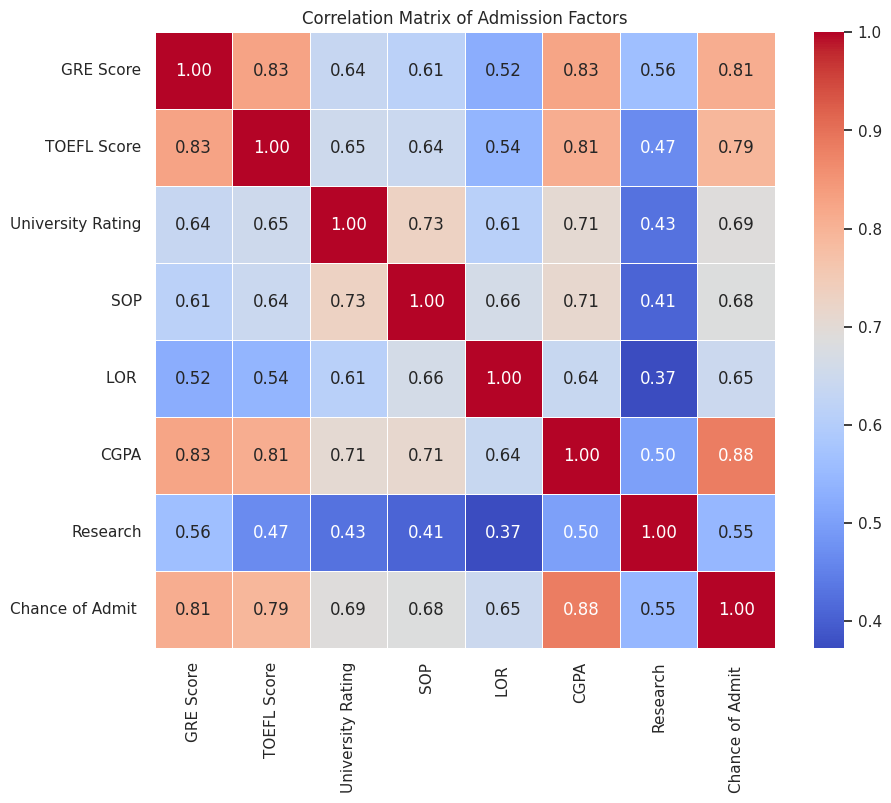

In [9]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Admission Factors")
plt.show()


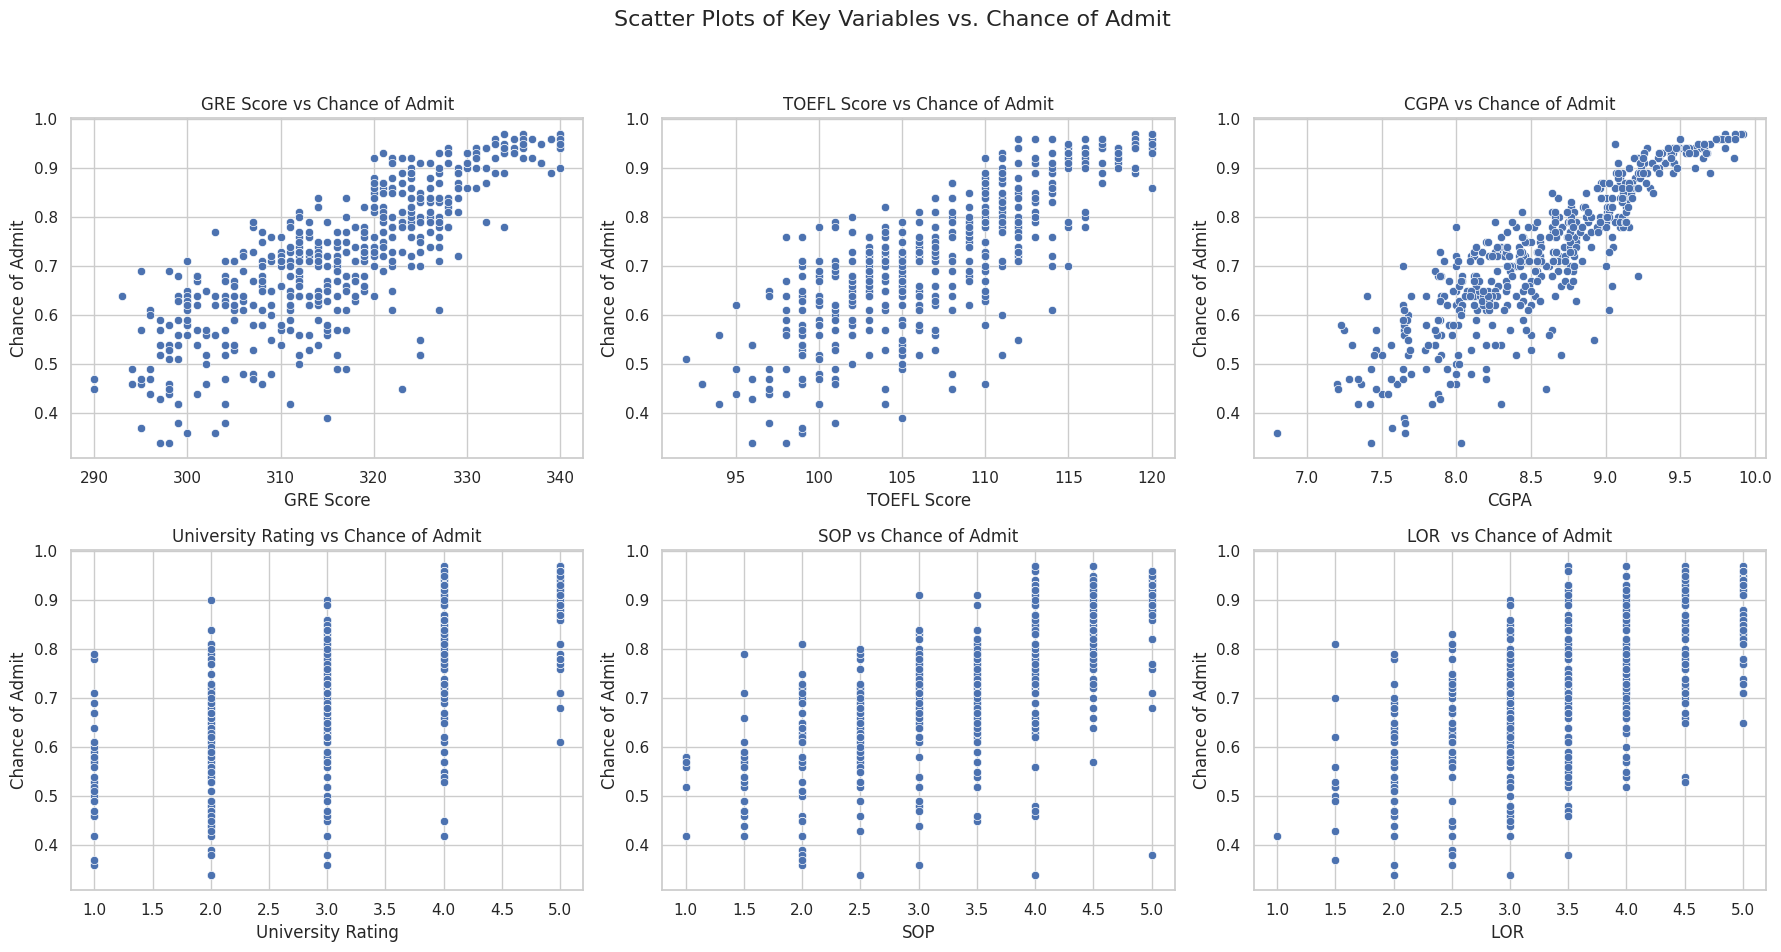

In [18]:
# Plotting scatter plots for key variables vs. Chance of Admit in a 2x3 grid
import matplotlib.pyplot as plt
import seaborn as sns

key_vars = ['GRE Score', 'TOEFL Score', 'CGPA', 'University Rating', 'SOP', 'LOR ']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Create a 2x3 grid
fig.suptitle("Scatter Plots of Key Variables vs. Chance of Admit", fontsize=16)

# Plot each scatter plot in its respective subplot
for i, var in enumerate(key_vars):
    row, col = divmod(i, 3)
    sns.scatterplot(ax=axes[row, col], x=data[var], y=data['Chance of Admit '])
    axes[row, col].set_title(f'{var} vs Chance of Admit')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Chance of Admit')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the title
plt.show()


### Bivariate Analysis Insights

1. **Correlation with Chance of Admit**:
   - **CGPA** has the highest correlation (0.88) with the "Chance of Admit". This suggests that a higher undergraduate GPA is a strong predictor of admission probability.
   - **GRE Score** and **TOEFL Score** are also highly correlated with the "Chance of Admit" (0.81 and 0.79, respectively). Higher standardized test scores increase the probability of admission, indicating that academic aptitude plays a crucial role.
   - **University Rating** shows a moderate positive correlation (0.69) with the "Chance of Admit". This indicates that students from higher-rated universities are more likely to be admitted.
   - **SOP** and **LOR** have moderate correlations with the "Chance of Admit" (0.68 and 0.65, respectively). A strong SOP and good recommendations positively influence admission chances, but their impact is not as high as CGPA, GRE, and TOEFL scores.
   - **Research Experience** has a relatively low correlation (0.55) with the "Chance of Admit". Although having research experience is beneficial, it is not as significant as other factors.

2. **Scatter Plot Analysis**:
   - The scatter plots for **GRE Score**, **TOEFL Score**, and **CGPA** vs. "Chance of Admit" show a clear positive trend, reinforcing that higher scores and GPAs are associated with higher admission probabilities.
   - For **University Rating**, **SOP**, and **LOR**, the scatter plots indicate a positive but weaker trend, suggesting that while they contribute to admission chances, their influence is comparatively lower.
   - **Research** is binary, and while applicants with research experience tend to have slightly higher chances, the scatter plot does not indicate as strong a relationship as the academic factors.

These insights highlight that academic performance (measured by CGPA, GRE, and TOEFL) is the most critical factor influencing admission chances, followed by university reputation, SOP, and recommendations. Research experience has a positive but relatively minor influence.


### Model Development

In this step, we will build a linear regression model to predict the "Chance of Admit" based on the selected variables. We will evaluate the model's performance and interpret the coefficients to understand the impact of each feature on the probability of admission.


In [12]:
# Import necessary libraries for modeling
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Defining features and target variable
X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = data['Chance of Admit ']

# Adding a constant to the model (for intercept)
X = sm.add_constant(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Fitting the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Displaying model summary
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Mon, 11 Nov 2024   Prob (F-statistic):          3.41e-142
Time:                        06:12:57   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4214      0.123    -11.549      0.000      -1.663      -1.179
GRE Score             0.0024      0.001      4.196      0.000       0.001       0.004
TOEFL Score           0.0030      0.001      3.174      0.002       0.001       0.005
University Rating     0.0026      0.004      0.611      0.541      -0.006       0.011
SOP                   0.0018      0.005      0.357      0.721      -0.008       0.012
LOR                   0.0172      0.005      3.761      0.000       0.008       0.026
CGPA                  0.1125      0.011     10.444      0.000       0.091       0.134
Research              0.0240      0.007      3.231      0.001       0.009       0.039
==============================================================================
Omnibus:                       86.232   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.099
Skew:                          -1.107   Prob(JB):                     5.25e-42
Kurtosis:                       5.551   Cond. No.                     1.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Displaying evaluation results
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.04272265427705371
Mean Squared Error (MSE): 0.003704655398788414
Root Mean Squared Error (RMSE): 0.06086588041578314
R-squared (R2): 0.8188432567829627


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Model Interpretation and Evaluation Insights

1. **R-squared and Adjusted R-squared**:
   - The **R-squared value** of 0.821 indicates that the model explains about 82.1% of the variance in the "Chance of Admit" variable, which suggests a good fit.
   - The **Adjusted R-squared** of 0.818 is slightly lower but close to the R-squared value, indicating that the model’s performance remains strong even after adjusting for the number of predictors.

2. **Coefficients and Significance**:
   - **GRE Score** and **TOEFL Score** have positive coefficients, with statistically significant p-values (< 0.05), indicating that higher scores in these exams are associated with a higher chance of admission.
   - **CGPA** has the highest coefficient (0.1125) and is statistically significant, confirming that undergraduate GPA is a crucial factor in predicting admission chances.
   - **Research Experience** has a positive coefficient (0.0240) and a statistically significant p-value, suggesting that having research experience slightly increases the probability of admission.
   - **LOR** (Letter of Recommendation Strength) is also significant, indicating that strong recommendations contribute positively to the chance of admission.
   - **University Rating** and **SOP** (Statement of Purpose) have relatively low coefficients and are not statistically significant (p-values > 0.05), suggesting they may not be strong predictors in this model.

3. **Evaluation Metrics**:
   - **Mean Absolute Error (MAE)**: 0.0427 - On average, the model's predictions are off by around 0.0427, indicating a low error.
   - **Mean Squared Error (MSE)**: 0.0037 - The MSE indicates the average of the squared errors, giving a sense of the magnitude of prediction errors.
   - **Root Mean Squared Error (RMSE)**: 0.0609 - RMSE further confirms that the model predictions are close to the actual values.
   - **R-squared (R2)** on the test set is 0.819, which is consistent with the training R-squared, indicating that the model generalizes well to new data.

4. **Observations**:
   - The model performs well overall, with CGPA, GRE Score, and TOEFL Score emerging as the most influential factors in predicting the chance of admission.
   - The high condition number (1.37e+04) in the model summary suggests potential multicollinearity, which could impact the reliability of coefficients. Future model adjustments, such as using regularization techniques (Ridge or Lasso), could help mitigate this.

These insights show that academic performance (CGPA, GRE, TOEFL) and research experience are critical factors in determining admission chances. However, factors like University Rating and SOP may not significantly influence admission probability in this model.


### Testing the Assumptions of Linear Regression

In this step, we will check if the linear regression model satisfies key assumptions:
1. **Linearity**: Relationship between independent variables and the dependent variable is linear.
2. **Independence**: Observations are independent of each other.
3. **Homoscedasticity**: Constant variance of residuals.
4. **Normality of Residuals**: Residuals should be normally distributed.
5. **Multicollinearity**: Minimal correlation among independent variables.


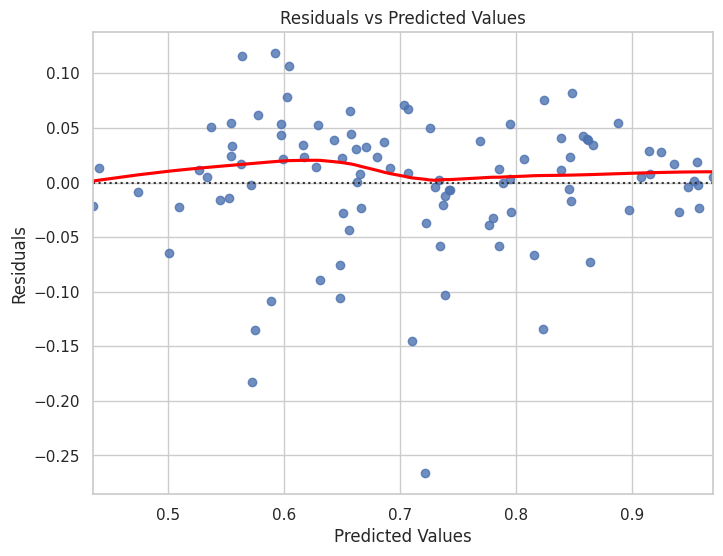

In [15]:
# Plotting residuals to check for linearity and homoscedasticity
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


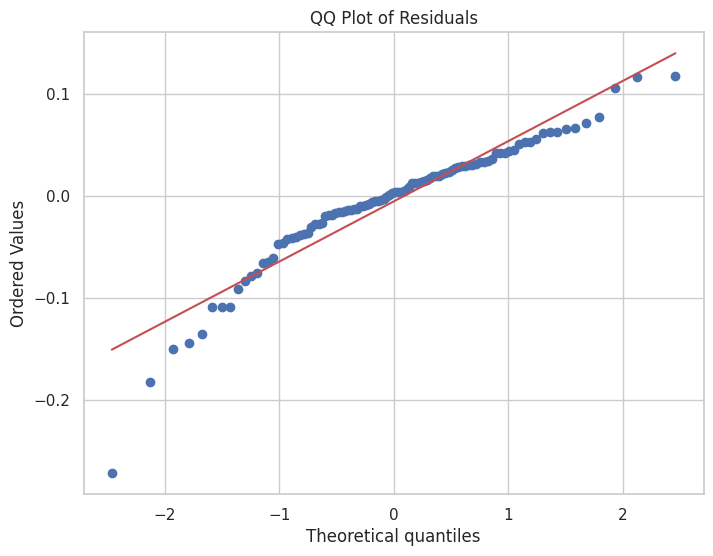

In [16]:
# QQ plot for normality of residuals
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(y_test - y_pred, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data


,Feature,VIF
0,const,1511.495830
1,GRE Score,4.464249
2,TOEFL Score,3.904213
3,University Rating,2.621036
4,SOP,2.835210
5,LOR,2.033555
6,CGPA,4.777992
7,Research,1.494008


### Interpretation of Assumptions Testing

1. **Linearity and Homoscedasticity**:
   - The **Residuals vs. Predicted Values** plot shows that residuals are randomly scattered around zero, with no distinct pattern. This suggests that the linearity assumption holds.
   - There is no clear funnel shape in the residuals, indicating that **homoscedasticity** (constant variance of residuals) is likely satisfied. However, some minor variations could still be present, so further validation may be needed in a more robust model.

2. **Normality of Residuals**:
   - The **QQ Plot** indicates that most residuals follow the straight line, suggesting that they are approximately normally distributed. However, there are a few points at the tails that deviate slightly, which may indicate mild skewness or kurtosis. Overall, the normality assumption holds well for this model.

3. **Multicollinearity**:
   - The **Variance Inflation Factor (VIF)** values show that all features have VIFs below 5, which is generally acceptable and indicates low multicollinearity.
   - The high VIF for the constant term suggests that multicollinearity among the features is minimal, so no features need to be removed.

These assumptions check results validate that our linear regression model is reliable, with no major issues in the assumptions of linearity, homoscedasticity, normality, or multicollinearity.


### Actionable Insights and Recommendations

Based on our model analysis and understanding of the factors influencing graduate admissions, here are the key insights and recommendations that Jamboree Education can leverage to enhance their admissions prediction feature.


1. **Key Predictors of Admission**:
   - **CGPA** is the strongest predictor of admission chances, with a high positive coefficient. This suggests that students with higher undergraduate GPAs have a significantly better chance of admission.
   - **GRE Score** and **TOEFL Score** also strongly influence admission probability. Higher scores in these standardized exams correlate with higher chances of admission, highlighting the importance of academic aptitude.
   - **Research Experience** is a positive factor, although its impact is less pronounced than GPA and test scores. Encouraging students to participate in research may slightly improve their admission chances.

2. **Moderate Impact of SOP and LOR**:
   - **Statement of Purpose (SOP)** and **Letter of Recommendation (LOR)** show moderate but not significant impact on the chance of admission in our model. While these factors contribute to the admission decision, their influence is relatively lower than academic metrics.
   - Jamboree can consider advising students to focus on strengthening these areas as supplementary factors rather than primary determinants.

3. **University Rating**:
   - Although **University Rating** has a positive influence on admission chances, it is not as impactful as other academic factors. Students from higher-rated universities have a slight advantage, but it’s not a decisive factor.
   - This insight suggests that Jamboree’s guidance can be tailored to assure students from less prestigious universities that they still have strong chances if they perform well in academic and standardized tests.

4. **Feature Improvements for Jamboree’s Prediction Tool**:
   - Emphasize **CGPA**, **GRE Score**, and **TOEFL Score** as primary inputs in the admission prediction feature, as these factors have the highest impact on admission probability.
   - Highlight the role of **Research Experience** as a positive, albeit secondary, factor. Including it in the prediction tool can provide a slight boost in predictive accuracy.
   - SOP and LOR could be treated as supplementary inputs, allowing the prediction tool to accommodate students with varying levels of strength in these areas.

5. **Suggestions for Future Data Collection**:
   - Consider gathering additional data points that may capture non-academic factors influencing admission, such as **extracurricular activities, internships, and relevant work experience**.
   - These additional variables could enhance the prediction model’s accuracy and allow Jamboree to provide more comprehensive insights to applicants.

6. **Real-World Implications for Students**:
   - Jamboree can advise students to prioritize improving their academic metrics (GPA, GRE, TOEFL) for the highest impact on their admission chances.
   - For students with lower standardized test scores, focusing on research experience and strong SOP/LOR could provide an added advantage, as these factors contribute positively but moderately to admission chances.

These insights and recommendations can help Jamboree Education enhance their admissions prediction feature, making it more informative for students aspiring to top graduate programs.


### Conclusions and Summary

In this project, we conducted an in-depth analysis of factors influencing graduate admissions, aiming to assist Jamboree Education in enhancing their admissions prediction feature. Here’s a summary of our key findings, methodology, and recommendations.


1. **Objective**:
   - The primary goal was to identify key factors that influence the probability of graduate admissions and build a predictive model to estimate admission chances. We aimed to provide actionable insights for Jamboree’s new feature, which helps students estimate their likelihood of admission.

2. **Methodology**:
   - We started with **Exploratory Data Analysis (EDA)** to understand the data structure and distribution of variables.
   - We then performed **Bivariate Analysis** to examine the relationships between key factors and the "Chance of Admit" variable, highlighting how academic and profile characteristics influence admission.
   - We built a **Linear Regression Model** and evaluated it based on performance metrics (MAE, MSE, RMSE, R-squared) and tested assumptions to ensure model reliability.
   - Finally, we generated **Actionable Insights and Recommendations** based on the results of the analysis.

3. **Key Findings**:
   - **CGPA**, **GRE Score**, and **TOEFL Score** emerged as the most significant predictors of admission chances.
   - **Research Experience** has a positive influence on admission probability, though its impact is less substantial than academic factors.
   - **SOP** and **LOR** have moderate influence, suggesting that while they are important, their impact on admission chances is lower compared to academic metrics.
   - **University Rating** has some influence, but it’s not a decisive factor in the admission process.

4. **Model Evaluation**:
   - The model performed well, with an **R-squared of 0.821**, indicating that 82.1% of the variation in admission chances was explained by the model.
   - Assumptions of linearity, normality, homoscedasticity, and low multicollinearity were satisfied, validating the model's reliability.

5. **Recommendations**:
   - For Jamboree’s prediction tool, emphasize **CGPA**, **GRE**, and **TOEFL** as core factors.
   - Consider SOP and LOR as supplementary inputs and provide additional guidance on their importance.
   - Collect additional data (e.g., internships, extracurriculars) to enhance the prediction model’s accuracy in the future.

6. **Real-World Implications**:
   - Jamboree can guide students to focus on strengthening their academic profile for higher admission chances.
   - For students with lower academic scores, Jamboree can encourage research experience and strong SOP/LOR to boost their profiles.

This analysis provides a structured, data-driven approach to understanding graduate admissions, helping Jamboree make their admissions prediction feature more impactful and beneficial for students.
